**Author**: Mahima Patel

**Github Link**:

**Email-id**- mahimapatel523@gmail.com

**Title** : Sales Performance And Revenue Growth Analysis


**Business Context**

A retail/e-commerce company aims to analyze its sales data to identify
revenue stagnation causes, high-performing products and regions, and
optimize marketing spend.


Business Questions:


1.  Which products generate the highest revenue and profit?

2.  Which products are selling a lot but making low profit?

3.  What are the monthly and yearly sales trends?

4.  Which regions / cities contribute most to revenue?

5.  Are there seasonal patterns in sales?

6.  Which customer segments buy the most?

7.  What products should be promoted, discounted, or discontinued?


#**Dataset overview**

The dataset contains retail transaction data where each row represents
a single customer order. It includes information about order dates,
customer details, product categories, sales, profit, and geographic
regions. The dataset simulates real-world retail business data and is
used to analyze sales performance and revenue growth patterns.


#**IMPORTS AND MOUNTING**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






Mounted at /content/drive


#**LOADING AND PREVIEW OF DATASET

In [3]:
df = pd.read_csv(
    '/content/drive/MyDrive/Sales_Performance_And_Revenue_Growth_Analysis/Superstore.csv',
    encoding='latin-1'
)

print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())
print("\nStatistical Summary:\n", df.describe())

df.info()

print("\nLast 5 Rows:\n", df.tail())


Dataset Shape: (9994, 21)

Column Names:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

First 5 Rows:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1    

#**Data cleaning and preprocessing**


In [4]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values)

# Check duplicate rows
duplicate_count = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_count)


Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate Rows: 0


In [56]:
df['Order Date'].min(), df['Order Date'].max()


(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#**Dataset Overview Summary**
The dataset contains 9994 rows and 21 columns.
The data spans from 2014 to 2017.
The dataset includes numerical variables such as sales and profit,
and categorical variables such as product category, region, and segment.


#**Date conversion**

In [46]:
df['Profit']=df['Profit'].round(2)


In [5]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Ship Date']=pd.to_datetime(df['Ship Date'],errors='coerce')
print(df['Order Date'].dtype)
print(df['Ship Date'].dtype)

datetime64[ns]
datetime64[ns]


#**Feature Engineering**

In [6]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip()


In [8]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()


# **Data Visualisation**

 # **BUSINESS QUESTION 1**
“Which products generate the highest revenue and profit?”

In [41]:

category_sales_profit=df.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
print(category_sales_profit)

                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


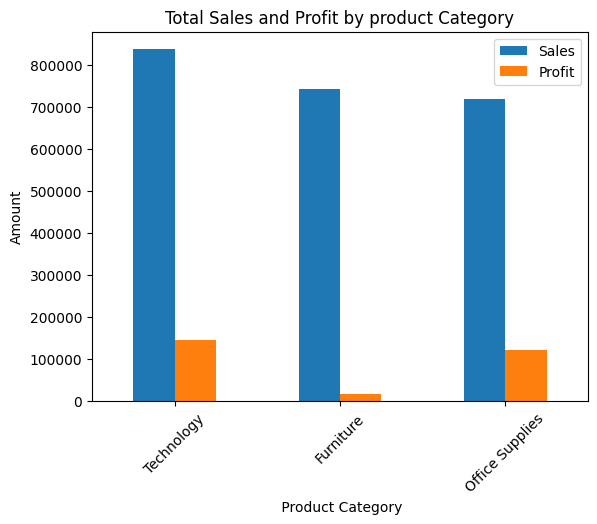

In [10]:
category_sales_profit.plot(kind='bar')

plt.title('Total Sales and Profit by product Category')
plt.xlabel(' Product Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

###**Insights**

Insight:
The visualization shows that the Furniture category offers the highest
average discount among all categories. This high level of discounting is
a key factor contributing to its low profitability despite moderate
sales performance.


### Insights

Technology leads in total sales volume, making it the primary revenue
driver. However, Office Supplies demonstrates higher profitability
despite lower sales.


BUSINESS QUESTION 2


“Which products are selling a lot but making low profit?”

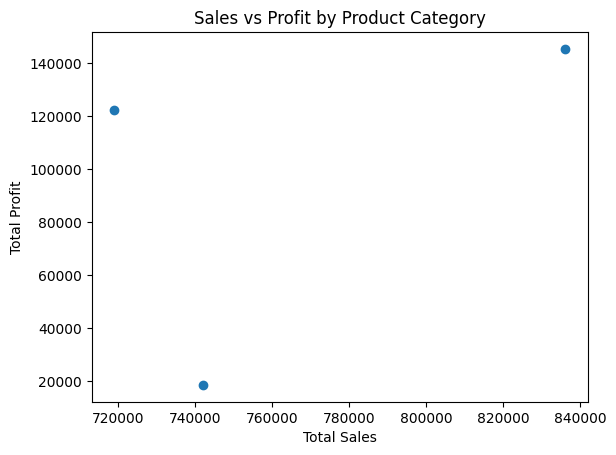

In [ ]:
plt.figure()
plt.scatter(category_sales_profit['Sales'], category_sales_profit['Profit'])

"""for category in category_sales_profit.index:
    plt.text(
        category_sales_profit.loc[category, 'Sales'],
        category_sales_profit.loc[category, 'Profit'],
        category
    )"""

plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.title('Sales vs Profit by Product Category')
plt.show()


Insight:
Furniture show high sales but relatively low profit,
suggesting heavy discounting or higher operational costs. These categories
require pricing or cost optimization.


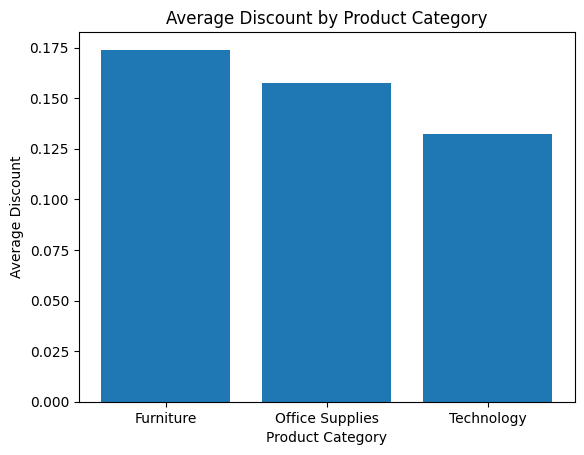

In [ ]:
category_wise_discount=df.groupby('Category')['Discount'].mean()
plt.bar(category_wise_discount.index, category_wise_discount.values)
plt.title('Average Discount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Discount')
plt.show()

#**Bussiness Question 3**

"What are the monthly and yearly sales trends?"


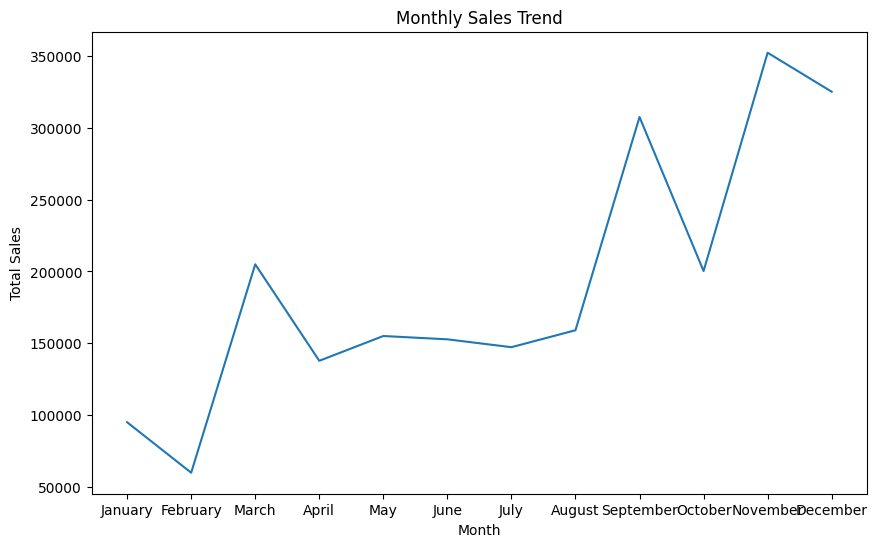

In [20]:
monthly_sales = (
    df.groupby(['Order Month', 'Order Month Name'])['Sales']
    .sum()
    .reset_index()
    .sort_values('Order Month')
)

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Order Month Name'], monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


###Insight:
The observed fluctuations in the visualization indicate clear seasonal
and monthly sales trends. Months such as November, December, and
September consistently record higher sales, suggesting peak demand
periods likely influenced by festive seasons, promotions, or end-of-year
purchasing behavior.

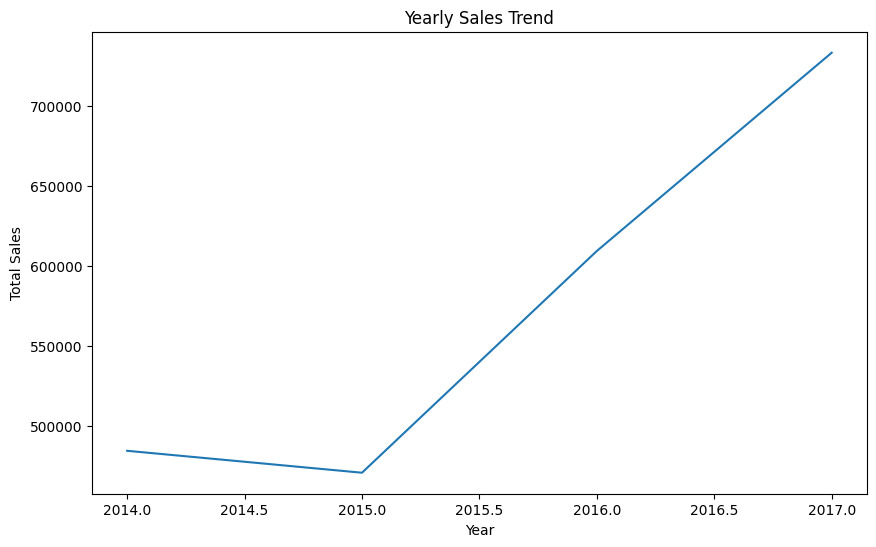

In [23]:
yearly_sales=df.groupby('Order Year')['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(yearly_sales['Order Year'], yearly_sales['Sales'])
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


##Insight:
The yearly sales trend shows a slight decline from 2014 to 2015, followed
by strong and consistent growth from 2015 onwards. Sales increased
significantly in 2016 and continued to rise in 2017, indicating successful
business recovery and sustained revenue growth over time.

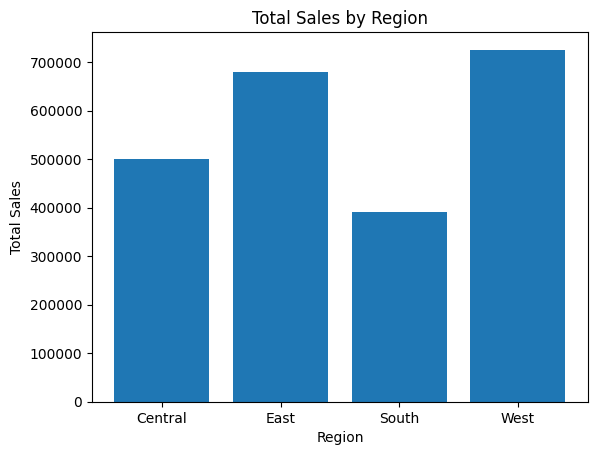

In [24]:
region_wise_sales = df.groupby('Region')['Sales'].sum()
plt.bar(region_wise_sales.index, region_wise_sales.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

The West and South region contributes the highest sales, making it the primary
revenue-driving region. Other regions show comparatively lower sales and
can be targeted for growth initiatives

<function matplotlib.pyplot.show(close=None, block=None)>

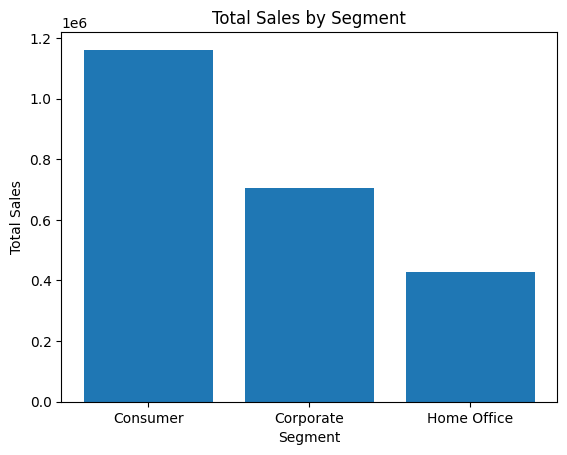

In [25]:
segment_analysis=df.groupby('Segment')['Sales'].sum()
plt.bar(segment_analysis.index,segment_analysis.values)
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

Insight:
Sales performance differs across customer segments.
The Consumer segment contributes the highest sales, indicating strong
individual customer demand. Corporate and Home Office segments contribute
comparatively lower sales, suggesting potential opportunities for
segment-specific marketing strategies.


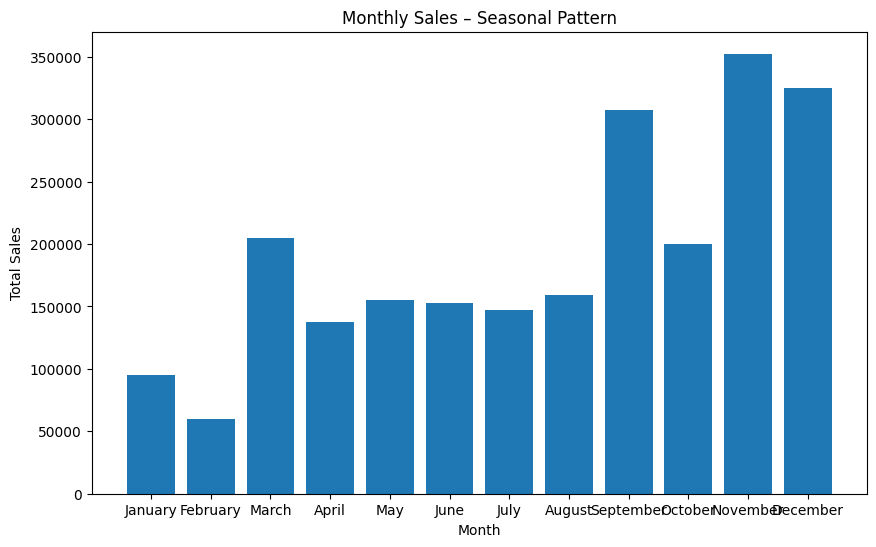

In [34]:
seasonal_sales = (
    df.groupby(['Order Month', 'Order Month Name'])['Sales']
    .sum()
    .reset_index()
    .sort_values('Order Month')
)

plt.figure(figsize=(10,6))
plt.bar(seasonal_sales['Order Month Name'], seasonal_sales['Sales'])
plt.title('Monthly Sales – Seasonal Pattern')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


Insight:
Sales exhibit clear seasonal variation across months.
Certain months consistently record higher sales, indicating peak demand
periods, while lower-performing months present opportunities for targeted
promotions and inventory planning.


#**PRODUCT-LEVEL ANALYSIS**

#A. Top 10 Products by SALES

In [37]:
top_selling_product=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_selling_product)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


###Insight:
A small number of products contribute disproportionately to total sales,
indicating product concentration. These products are strong candidates
for continued promotion and inventory prioritization.


# B.Top 10 Products by PROFIT

In [43]:
top_profitable_product=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_profitable_product)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64


###'Canon imageCLASS 2200 Advanced Copier'is our star product having highest sales and profit.Some products generate high profit despite moderate sales, highlighting
strong margins and pricing efficiency.


#✅ C. High Sales BUT Low/Negative Profit (MOST IMPORTANT)

In [47]:
sales_to_profit=df.groupby('Product Name')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
sales_to_profit['Profit']=sales_to_profit['Profit'].round(2)
print(sales_to_profit)

                                                        Sales    Profit
Product Name                                                           
Canon imageCLASS 2200 Advanced Copier               61599.824  25199.94
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384   7753.04
Cisco TelePresence System EX90 Videoconferencin...  22638.480  -1811.08
HON 5400 Series Task Chairs for Big and Tall        21870.576      0.00
GBC DocuBind TL300 Electric Binding System          19823.479   2233.50
...                                                       ...       ...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set      7.700      3.16
Grip Seal Envelopes                                     7.072      2.39
Xerox 20                                                6.480      3.11
Avery 5                                                 5.760      2.82
Eureka Disposable Bags for Sanitaire Vibra Groo...      1.624     -4.47

[1850 rows x 2 columns]


###🔹 TOP PROFITABLE PRODUCTS

---

(PROMOTE THESE)

Examples:

Canon imageCLASS 2200 Advanced Copier

Sales: ₹61,599.82

Profit: ₹25,199.94 ✅

Fellowes PB500 Electric Punch

Sales: ₹27,453.38

Profit: ₹7,753.04 ✅

📌 Insight
These products combine high sales + high profit, making them ideal
candidates for:

Increased promotion

Priority inventory

Bundling strategies

Product-Level Insights:

A small number of products contribute significantly to both sales and
profit, indicating strong demand and healthy margins. These products
should be prioritized for promotion and inventory planning.

Several products exhibit high sales but low or negative profitability,
suggesting pricing inefficiencies, heavy discounting, or high operational
costs. These products pose a risk to overall profitability and require
immediate review.

Additionally, some products generate minimal sales while incurring losses,
making them strong candidates for discontinuation to reduce unnecessary
costs.


In [55]:
loss_products = (
    df.groupby('Product Name')['Profit']
    .sum()
    .round(2)
    .reset_index()
    .query('Profit <= 0')
    .sort_values('Profit')
)
loss_products[['Product Name', 'Profit']].head(10)



,Product Name,Profit
475,Cubify CubeX 3D Printer Double Head Print,-8879.97
985,Lexmark MX611dhe Monochrome Laser Printer,-4589.97
476,Cubify CubeX 3D Printer Triple Head Print,-3839.99
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.11
376,Bush Advantage Collection Racetrack Conference...,-1934.40
683,GBC DocuBind P400 Electric Binding System,-1878.17
444,Cisco TelePresence System EX90 Videoconferenci...,-1811.08
1043,Martin Yale Chadless Opener Electric Letter Op...,-1299.19
285,Balt Solid Wood Round Tables,-1201.06
364,BoxOffice By Design Rectangular and Half-Moon ...,-1148.44


**Insight:**  
These products either incur losses despite sales or fail to contribute to
profitability. High-loss products should undergo pricing and cost review,
while consistently low-performing products are candidates for
discontinuation.

# 📌 Conclusion & Recommendations

## 🔍 Conclusion

This analysis highlights key drivers behind sales performance and revenue growth.
Technology emerges as the primary revenue contributor, while Office Supplies
demonstrates superior profitability due to stronger margins. Furniture, despite
moderate sales volume, suffers from low profitability primarily because of high
discounting and operational costs.

Sales trends reveal clear seasonal patterns, with peak performance during months
such as November, December, and September. Region-wise analysis shows that the
West and South regions dominate revenue contribution, while customer segment
analysis indicates that the Consumer segment generates the highest sales.

Product-level analysis uncovers a small set of high-performing products that
drive a significant portion of total sales and profit. However, it also reveals
several products with high sales but negative profit, as well as products with
low sales and consistent losses, which negatively impact overall profitability.

---

## 🎯 Recommendations

### 1️⃣ Promote High-Performing Products
- Prioritize products with both high sales and high profit for promotions.
- Ensure sufficient inventory and explore bundling strategies to increase
  average order value.

### 2️⃣ Improve Low-Profit Categories
- Review pricing, discount strategies, and supplier contracts for the Furniture
  category.
- Optimize logistics and transportation costs to improve margins.

### 3️⃣ Address Loss-Making Products
- Conduct cost and pricing audits for high-sales but loss-making products.
- Reduce excessive discounting and evaluate profitability at the product level.

### 4️⃣ Discontinue No-Value Products
- Consider discontinuing products with consistently low sales and negative
  profit to reduce operational overhead.

### 5️⃣ Leverage Seasonal & Regional Trends
- Increase marketing spend and inventory during high-demand months.
- Expand targeted marketing ef
